# Example 1: What price should I sell my used iphone for?
* This exmaple is taken from  http://www.statsathome.com/2017/10/12/bayesian-decision-theory-made-ridiculously-simple/

### The Problem
* Todo

In [25]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
% matplotlib inline

In [18]:
train = pd.DataFrame({"sold": [1, 1, 0, 0, 1, 1], 
                     "scratched": [0, 0, 1, 0, 0, 0], 
                     "year": [2014, 2015, 2010, 2014, 2015, 2016],
                     "price": [50, 70, 40, 100, 90, 100]})

In [19]:
train

,price,scratched,sold,year
0,50,0,1,2014
1,70,0,1,2015
2,40,1,0,2010
3,100,0,0,2014
4,90,0,1,2015
5,100,0,1,2016


### The model
$$y_{\text{sold}, i} \sim \text{Bernoulli}(\pi_i)$$
$$\pi_i \sim \text{logit}^{-1}(\eta_i)$$
$$\eta_i \sim \beta_0 + \beta_1 \text{scratched}_i + \beta_2 \text{year_i} + \beta_3 \text{price}_i$$

### Priors
$$\beta_0 \sim \text{Uniform}$$
$$\beta_1 \sim \mathcal N(-1, 1)$$
$$\beta_2 \sim \mathcal N(1, 1) $$
$$\beta_2 \sim \mathcal N(-2, 1) $$


### Next Steps
* Instead of year take feature "years old"
* Include interaction terms
* Use GLM syntax

In [ ]:
import pymc3 as pm
from scipy.special import expit

with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    intercept = pm.Uniform("intercept")
    beta_1 = pm.Normal("beta_1", -1, 1)
    beta_2 = pm.Normal("beta_2", 1, 1)
    beta_3 = pm.Normal("beta_3", -2, 1)
    
    pi = pm.math.invlogit(intercept + beta_1 * train.scratched + beta_2 * train.year + beta_3 * train.price)
    likelihood = pm.Bernoulli("y", pi,  observed=train.sold)
    
    trace = sample(2000, tune =1000)

/usr/local/lib/python3.6/dist-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
 52%|█████▏    | 1556/3000 [03:18<03:03,  7.85it/s]

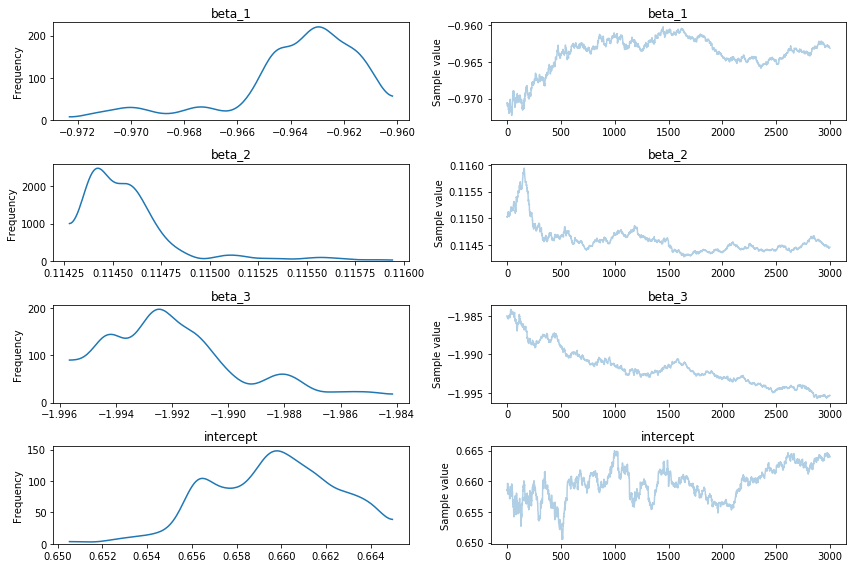

In [27]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout();

# Example 2: Shall I take the bus?